In [1]:
import math as mt
import fractions as fra
from numpy.linalg import det, inv
import numpy as np
from sympy.abc import *
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from sympy.interactive.printing import init_printing
from matplotlib.animation import PillowWriter

In [2]:
#Definimos las variables, en la ecuación de omnidireccional se necesitan estas funciones
L,r,t,R,m=smp.symbols(" L r t R m")
psi=smp.symbols(r"\psi_d")
psi1, psi2, psi3=smp.symbols(r"\psi_1, \psi_2, \psi_3",cls=smp.Function)
x, y, the= smp.symbols(r"x, y, \theta_1",cls=smp.Function)

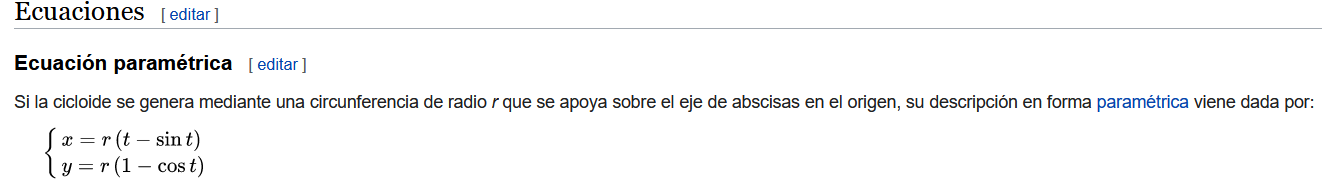

In [3]:
#Definimos las variables que dependen del tiempo
x=x(t)
y=y(t)
the=the(t)
x

x(t)

In [4]:
x=r*(t-smp.sin(t))
y=r*(1-smp.cos(t))
the=smp.atan(x/y)
MPS=smp.Matrix([[x], [y], [the]])
MPS

Matrix([
[                 r*(t - sin(t))],
[                 r*(1 - cos(t))],
[atan((t - sin(t))/(1 - cos(t)))]])

In [5]:
vx=smp.diff(x,t)
vy=smp.diff(y,t)
vthe=smp.diff(the,t)
MVS=smp.Matrix([[vx], [vy], [vthe]])
MVS

Matrix([
[                                                                 r*(1 - cos(t))],
[                                                                       r*sin(t)],
[(1 - (t - sin(t))*sin(t)/(1 - cos(t))**2)/(1 + (t - sin(t))**2/(1 - cos(t))**2)]])

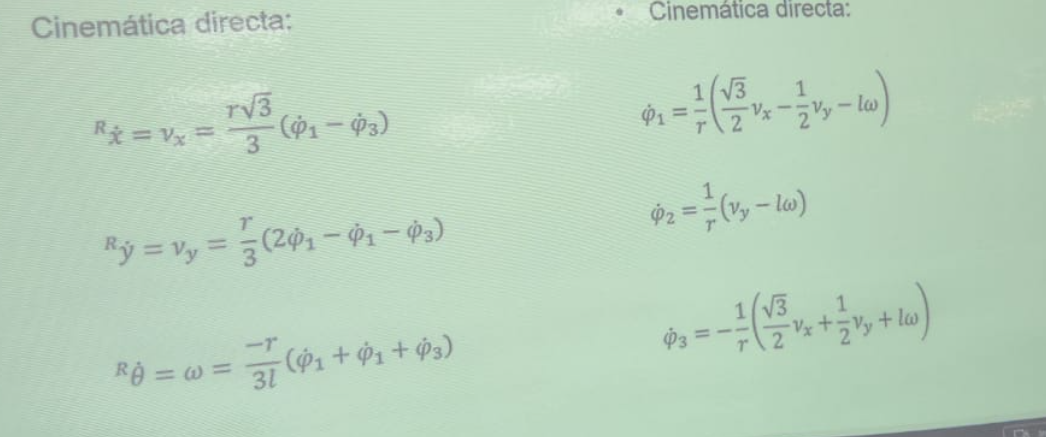

In [6]:
#Matrices y funciones de psi
v1=smp.Matrix([(smp.sqrt(3)/2,-1/2 , L)])*1/R
v2=smp.Matrix([(0, 1 , -L)])*1/R
v3=smp.Matrix([(smp.sqrt(3)/2,1/2 , L)])*(-1/R)
ME=smp.Matrix([[v1],[v2],[v3]])
ME

Matrix([
[ sqrt(3)/(2*R), -0.5/R,  L/R],
[             0,    1/R, -L/R],
[-sqrt(3)/(2*R), -0.5/R, -L/R]])

In [7]:
P=smp.Matrix([[psi1], [psi2],[psi3]])
P

C:\Users\jatar\AppData\Local\Temp\ipykernel_27516\2913811575.py:1: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  P=smp.Matrix([[psi1], [psi2],[psi3]])


Matrix([
[\psi_1],
[\psi_2],
[\psi_3]])

In [8]:
MVI=ME*MVS
MVI

Matrix([
[ L*(1 - (t - sin(t))*sin(t)/(1 - cos(t))**2)/(R*(1 + (t - sin(t))**2/(1 - cos(t))**2)) + sqrt(3)*r*(1 - cos(t))/(2*R) - 0.5*r*sin(t)/R],
[                                   -L*(1 - (t - sin(t))*sin(t)/(1 - cos(t))**2)/(R*(1 + (t - sin(t))**2/(1 - cos(t))**2)) + r*sin(t)/R],
[-L*(1 - (t - sin(t))*sin(t)/(1 - cos(t))**2)/(R*(1 + (t - sin(t))**2/(1 - cos(t))**2)) - sqrt(3)*r*(1 - cos(t))/(2*R) - 0.5*r*sin(t)/R]])

In [9]:
MPI=ME*MPS
MPI

Matrix([
[ L*atan((t - sin(t))/(1 - cos(t)))/R - 0.5*r*(1 - cos(t))/R + sqrt(3)*r*(t - sin(t))/(2*R)],
[                                   -L*atan((t - sin(t))/(1 - cos(t)))/R + r*(1 - cos(t))/R],
[-L*atan((t - sin(t))/(1 - cos(t)))/R - 0.5*r*(1 - cos(t))/R - sqrt(3)*r*(t - sin(t))/(2*R)]])

In [10]:
ppsi1=smp.lambdify((t,L,R,r),MPI[0])
ppsi2=smp.lambdify((t,L,R,r),MPI[1])
ppsi3=smp.lambdify((t,L,R,r),MPI[2])
ppsi1

<function _lambdifygenerated(t, L, R, r)>

In [11]:
psi1=MVI[0]
psi2=MVI[1]
psi3=MVI[2]

In [12]:
psi1_f=smp.lambdify((t,L,R,r),psi1)
psi2_f=smp.lambdify((t,L,R,r),psi2)
psi3_f=smp.lambdify((t,L,R,r),psi3)

In [13]:
psi1

L*(1 - (t - sin(t))*sin(t)/(1 - cos(t))**2)/(R*(1 + (t - sin(t))**2/(1 - cos(t))**2)) + sqrt(3)*r*(1 - cos(t))/(2*R) - 0.5*r*sin(t)/R

In [14]:
psi2

-L*(1 - (t - sin(t))*sin(t)/(1 - cos(t))**2)/(R*(1 + (t - sin(t))**2/(1 - cos(t))**2)) + r*sin(t)/R

In [15]:
psi3

-L*(1 - (t - sin(t))*sin(t)/(1 - cos(t))**2)/(R*(1 + (t - sin(t))**2/(1 - cos(t))**2)) - sqrt(3)*r*(1 - cos(t))/(2*R) - 0.5*r*sin(t)/R

In [16]:
t = np.linspace(.0001,6, 1001)
R=5
r=40
L=1

In [17]:
#print(psi1)
#psi1g=L*(1 - (t - np.sin(t))*np.sin(t)/(1 - np.cos(t))**2)/(R*(1 + (t - np.sin(t))**2/(1 - np.cos(t))**2)) + np.sqrt(3)*r*(1 - np.cos(t))/(2*R) - 0.5*r*np.sin(t)/R
#psi2g=-L*(1 - (t - np.sin(t))*np.sin(t)/(1 - np.cos(t))**2)/(R*(1 + (t - np.sin(t))**2/(1 - np.cos(t))**2)) + r*np.sin(t)/R
#psi3g=-L*(1 - (t - np.sin(t))*np.sin(t)/(1 - np.cos(t))**2)/(R*(1 + (t - np.sin(t))**2/(1 - np.cos(t))**2)) - np.sqrt(3)*r*(1 - np.cos(t))/(2*R) - 0.5*r*np.sin(t)/R

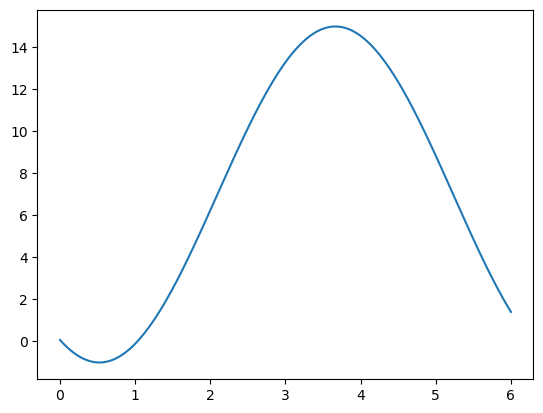

In [18]:
plt.plot(t, psi1_f(t,L,R,r))

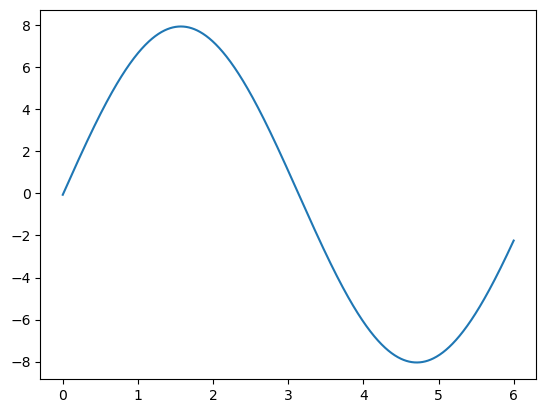

In [19]:
plt.plot(t, psi2_f(t,L,R,r))

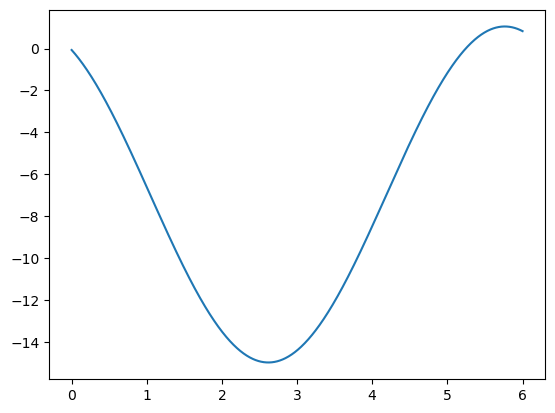

In [20]:
plt.plot(t, psi3_f(t,L,R,r))

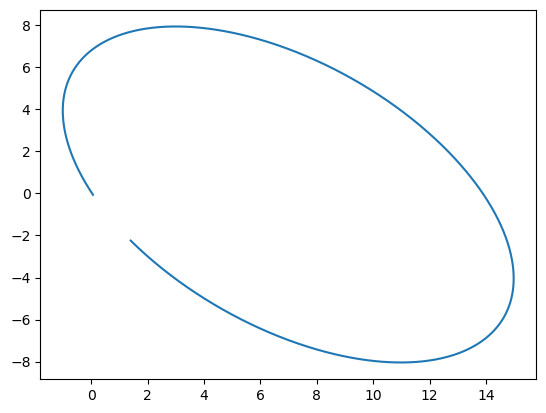

In [21]:
plt.plot(psi1_f(t,L,R,r), psi2_f(t,L,R,r))


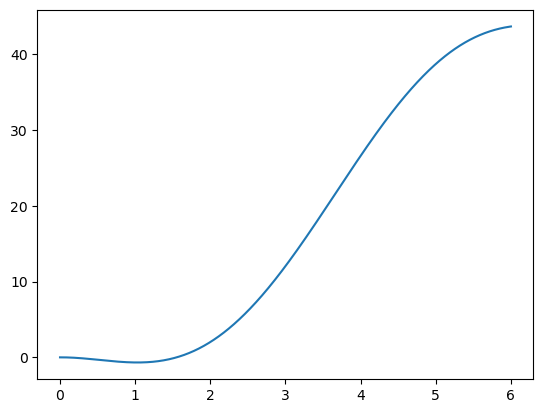

In [22]:
plt.plot(t,ppsi1(t,L,R,r))

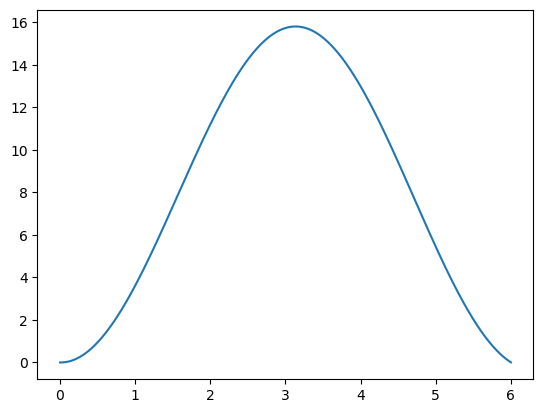

In [23]:
plt.plot(t,ppsi2(t,L,R,r))

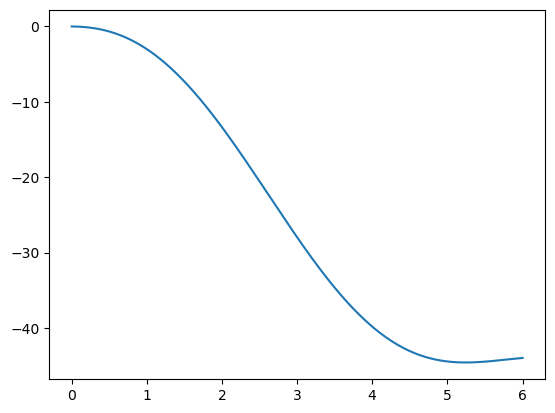

In [24]:
plt.plot(t,ppsi3(t,L,R,r))

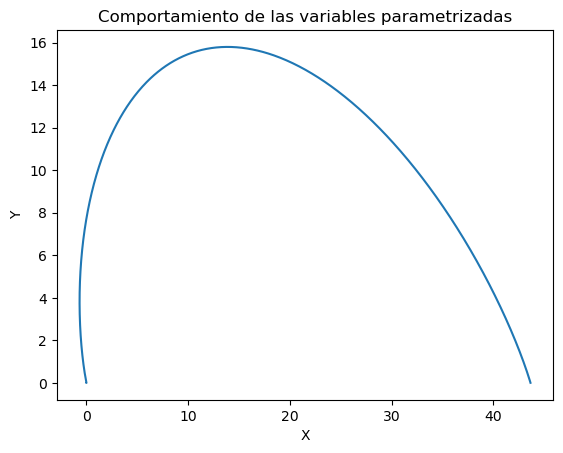

In [25]:
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Comportamiento de las variables parametrizadas")
plt.plot(ppsi1(t,L,R,r),ppsi2(t,L,R,r))


solucion de las ecuaciones de Euler - lagrange para hacer un sistema dinámico


In [26]:
hell=np.save('3Dcilindro', np.array([ppsi1(t,L,R,r),ppsi2(t,L,R,r)]))

hell

In [27]:
np.load("3Dcilindro.npy")

array([[ 6.64666765e-06,  3.32504696e-04,  5.15891654e-04, ...,
         4.36413890e+01,  4.36501189e+01,  4.36586386e+01],
       [-6.62666650e-06, -2.57825285e-04, -2.21039401e-04, ...,
         3.32319297e-02,  1.93508990e-02,  5.74700471e-03]])

In [28]:
ppsi1(t,L,R,r)[1]

0.00033250469639135844

In [29]:
import vpython
from vpython import *
import numpy as np

<IPython.core.display.Javascript object>

In [30]:
np.load("3Dcilindro.npy")

array([[ 6.64666765e-06,  3.32504696e-04,  5.15891654e-04, ...,
         4.36413890e+01,  4.36501189e+01,  4.36586386e+01],
       [-6.62666650e-06, -2.57825285e-04, -2.21039401e-04, ...,
         3.32319297e-02,  1.93508990e-02,  5.74700471e-03]])

In [31]:
z=.30
h = arange(0, 10, 0.1)
base  = box(color = color.white,pos=vector(0,-0.3,0),axis=vector(0,0,0),
            size=vector(100,0.5,100),texture={'file':textures.stones} )

rod1 = cylinder(color=color.red,pos=vector(0,0,0),axis=vector(0,.60,0), radius=3,make_trail=True)
rod2 = cylinder(color=color.red,pos=vector(0,0,0),axis=vector(0,.31,0), radius=.001,make_trail=True,)

print('Start')
i = 0

for i in range (1000) :
    rate(100)
    i = i + 1
    i = i % len(ppsi1(t,L,R,r))
    rod2.pos = vector(ppsi1(t,L,R,r)[i], 0, ppsi2(t,L,R,r)[i])
i=0
while True:
    rate(100)
    i = i + 1
    i = i % len(ppsi1(t,L,R,r))
    rod1.pos = vector(ppsi1(t,L,R,r)[i], 0, ppsi2(t,L,R,r)[i])



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Start


KeyboardInterrupt: 

In [ ]:
ppsi1(t,L,R,r)[1000]

